# Energy Tests for Connector Components

This notebook tests the energy losses through various connector types in the ethanol production plant piping system.
All flow rates are in m³/s and mass flow rates are in kg/s.
**Using realistic industrial-scale flow rates (10-100 m³/h) for meaningful energy analysis.**

**Version 0.5.0 Compatible**

In [ ]:
from systems.connectors import Pipe, Bend, Valve
import matplotlib.pyplot as plt
import numpy as np

# Display version info
print("Connector Tests - Version 0.5.0")
print("=" * 60)

Connector Tests - Version 0.5.0


## 1. Pipe Energy Loss Testing

Pipes lose energy due to friction. Energy loss increases with length, flow rate, and friction factor.
Using the Darcy-Weisbach equation for friction losses.

In [ ]:
# Create a pipe with specific properties
pipe = Pipe(
    length=10.0,           # 10 meters long
    diameter=0.1,          # 0.1 meter (10 cm) diameter
    friction_factor=0.02   # Typical friction factor for commercial steel
)

# Test with realistic industrial flow rates
flow_rates_hourly = np.linspace(10.0, 100.0, 10)  # m³/h (industrial scale)
flow_rates = flow_rates_hourly / 3600  # Convert to m³/s
input_mass_flow_hourly = 50000  # kg/h (50 tons/hour - typical for ethanol plant)
input_mass_flow = input_mass_flow_hourly / 3600  # Convert to kg/s

energy_losses = []

print("Testing Pipe component...")
for flow in flow_rates:
    energy_loss = pipe.pipeEnergyFunction(
        input_flow=flow,
        input_mass=input_mass_flow
    )
    energy_losses.append(energy_loss)

print("Pipe Energy Loss Analysis:")
print(f"Pipe length: {pipe.length} m")
print(f"Pipe diameter: {pipe.diameter} m")
print(f"Friction factor: {pipe.friction_factor}")
print(f"\nFlow rate range: {flow_rates[0]:.6f} - {flow_rates[-1]:.6f} m³/s ({flow_rates_hourly[0]:.2f} - {flow_rates_hourly[-1]:.2f} m³/h)")
print(f"Mass flow rate: {input_mass_flow:.6f} kg/s ({input_mass_flow_hourly:.2f} kg/h)")
print(f"Energy loss range: {energy_losses[0]:.2f} - {energy_losses[-1]:.2f} J")
print(f"Power loss range: {energy_losses[0]:.2f} - {energy_losses[-1]:.2f} W")
print(f"Max energy loss: {max(energy_losses):.2f} J")

Testing Pipe component...
Pipe Energy Loss Analysis:
Pipe length: 10.0 m
Pipe diameter: 0.1 m
Friction factor: 0.02

Flow rate range: 0.002778 - 0.027778 m³/s (10.00 - 100.00 m³/h)
Mass flow rate: 13.888889 kg/s (50000.00 kg/h)
Energy loss range: 1.74 - 173.73 J
Power loss range: 1.74 - 173.73 W
Max energy loss: 173.73 J


## 2. Bend Energy Loss Testing

Bends cause energy losses due to flow direction changes and turbulence.
Loss depends on bend radius and bend factor (efficiency).

In [ ]:
# Create a bend with specific properties
bend = Bend(
    bend_radius=0.5,    # 0.5 meter radius
    diameter=0.1,       # 0.1 meter diameter
    bend_factor=0.9     # 90% efficient (10% loss)
)

# Test with same flow rates
bend_energy_losses = []

print("Testing Bend component...")
for flow in flow_rates:
    energy_loss = bend.bendEnergyFunction(
        input_flow=flow,
        input_mass=input_mass_flow
    )
    bend_energy_losses.append(energy_loss)

print("Bend Energy Loss Analysis:")
print(f"Bend radius: {bend.bend_radius} m")
print(f"Bend diameter: {bend.diameter} m")
print(f"Bend factor: {bend.bend_factor}")
print(f"\nFlow rate range: {flow_rates[0]:.6f} - {flow_rates[-1]:.6f} m³/s ({flow_rates_hourly[0]:.2f} - {flow_rates_hourly[-1]:.2f} m³/h)")
print(f"Energy loss range: {bend_energy_losses[0]:.2f} - {bend_energy_losses[-1]:.2f} J")
print(f"Power loss range: {bend_energy_losses[0]:.2f} - {bend_energy_losses[-1]:.2f} W")
print(f"Max energy loss: {max(bend_energy_losses):.2f} J")

Testing Bend component...
Bend Energy Loss Analysis:
Bend radius: 0.5 m
Bend diameter: 0.1 m
Bend factor: 0.9

Flow rate range: 0.002778 - 0.027778 m³/s (10.00 - 100.00 m³/h)
Energy loss range: 0.09 - 8.69 J
Power loss range: 0.09 - 8.69 W
Max energy loss: 8.69 J


## 3. Valve Energy Loss Testing

Valves provide controllable resistance to flow. Energy loss is proportional to the resistance coefficient and velocity squared.

In [ ]:
# Create a valve with specific properties
valve = Valve(
    resistance_coefficient=1.0,  # Standard resistance
    diameter=0.1                 # 0.1 meter diameter
)

# Test with same flow rates
valve_energy_losses = []

print("Testing Valve component...")
for flow in flow_rates:
    energy_loss = valve.valveEnergyFunction(
        input_flow=flow,
        input_mass=input_mass_flow
    )
    valve_energy_losses.append(energy_loss)

print("Valve Energy Loss Analysis:")
print(f"Resistance coefficient: {valve.resistance_coefficient}")
print(f"Valve diameter: {valve.diameter} m")
print(f"\nFlow rate range: {flow_rates[0]:.6f} - {flow_rates[-1]:.6f} m³/s ({flow_rates_hourly[0]:.2f} - {flow_rates_hourly[-1]:.2f} m³/h)")
print(f"Energy loss range: {valve_energy_losses[0]:.2f} - {valve_energy_losses[-1]:.2f} J")
print(f"Power loss range: {valve_energy_losses[0]:.2f} - {valve_energy_losses[-1]:.2f} W")
print(f"Max energy loss: {max(valve_energy_losses):.2f} J")

Testing Valve component...
Valve Energy Loss Analysis:
Resistance coefficient: 1.0
Valve diameter: 0.1 m

Flow rate range: 0.002778 - 0.027778 m³/s (10.00 - 100.00 m³/h)
Energy loss range: 0.87 - 86.87 J
Power loss range: 0.87 - 86.87 W
Max energy loss: 86.87 J


## 4. Comparative Energy Loss Visualization

Generating comparative visualization...


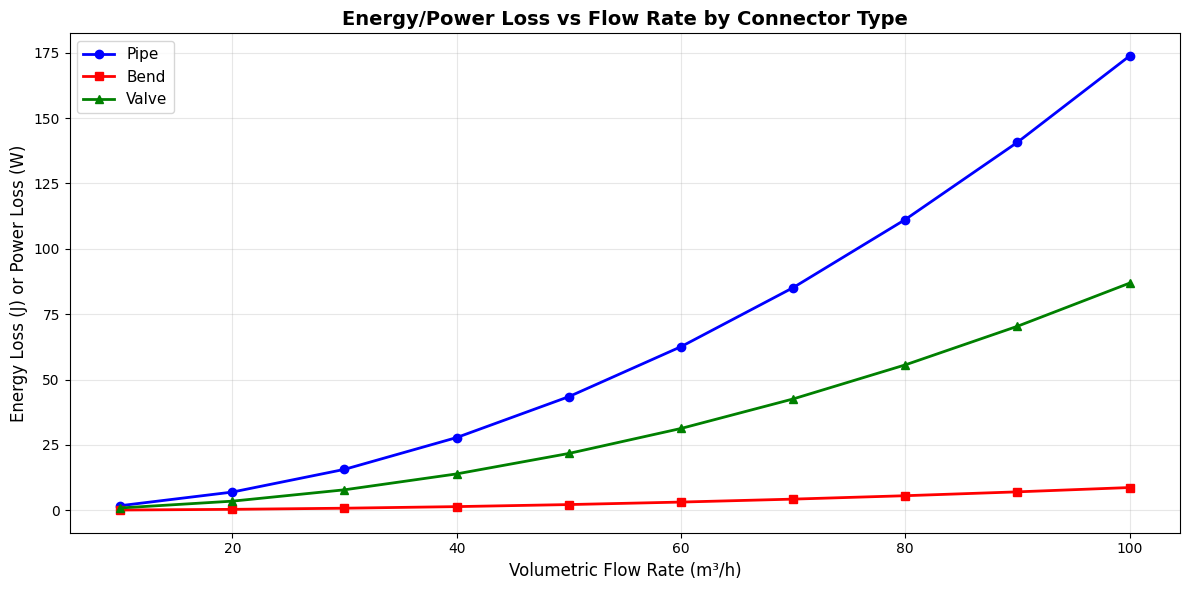


At maximum flow rate (100.00 m³/h = 0.027778 m³/s):
  Pipe loss: 173.73 J (173.73 W)
  Bend loss: 8.69 J (8.69 W)
  Valve loss: 86.87 J (86.87 W)


In [ ]:
# Plot energy losses for all connector types
print("Generating comparative visualization...")
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot: Energy loss vs flow rate (display in m³/h for readability)
ax.plot(flow_rates_hourly, energy_losses, 'b-o', label='Pipe', linewidth=2, markersize=6)
ax.plot(flow_rates_hourly, bend_energy_losses, 'r-s', label='Bend', linewidth=2, markersize=6)
ax.plot(flow_rates_hourly, valve_energy_losses, 'g-^', label='Valve', linewidth=2, markersize=6)
ax.set_xlabel('Volumetric Flow Rate (m³/h)', fontsize=12)
ax.set_ylabel('Energy Loss (J) or Power Loss (W)', fontsize=12)
ax.set_title('Energy/Power Loss vs Flow Rate by Connector Type', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nAt maximum flow rate ({flow_rates_hourly[-1]:.2f} m³/h = {flow_rates[-1]:.6f} m³/s):")
print(f"  Pipe loss: {energy_losses[-1]:.2f} J ({energy_losses[-1]:.2f} W)")
print(f"  Bend loss: {bend_energy_losses[-1]:.2f} J ({bend_energy_losses[-1]:.2f} W)")
print(f"  Valve loss: {valve_energy_losses[-1]:.2f} J ({valve_energy_losses[-1]:.2f} W)")

## 5. Series Connection Analysis

Test energy losses when connectors are connected in series (realistic piping scenario).

SERIES CONNECTION ANALYSIS
Initial conditions:
  Volumetric flow rate: 0.013889 m³/s (50.00 m³/h)
  Mass flow rate: 13.888889 kg/s (50000.00 kg/h)

Piping system: Pipe (5m) -> Bend -> Valve -> Pipe (5m)

Energy losses by component:
  Pipe 1 (5m): 21.72 J = 21.72 W
  Bend:        2.17 J = 2.17 W
  Valve:       21.72 J = 21.72 W
  Pipe 2 (5m): 21.72 J = 21.72 W

  Total loss:  67.32 J = 67.32 W

Annual energy cost at $0.10/kWh: $58.97

Generating series connection visualization...


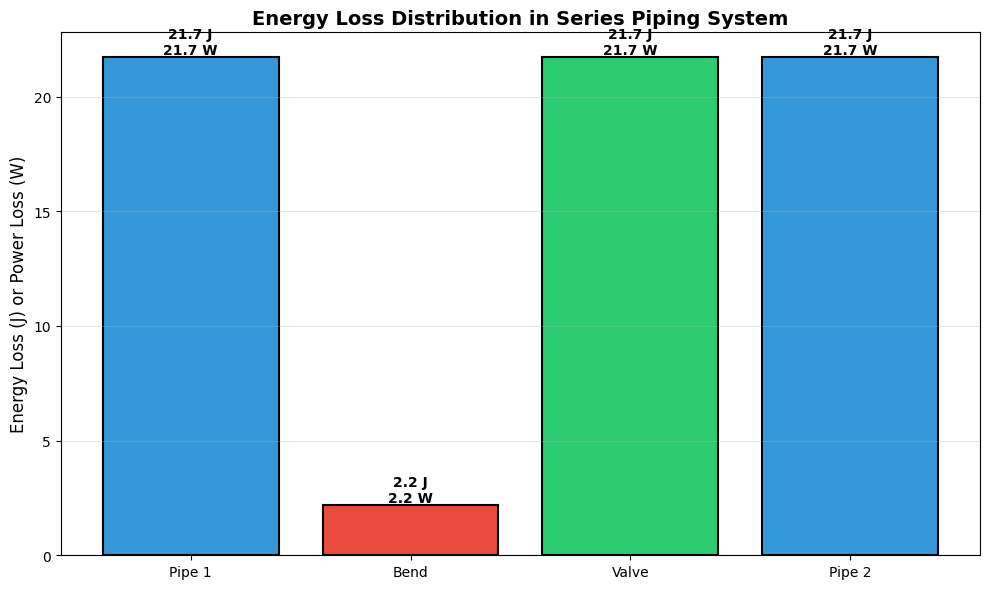

In [ ]:
# Simulate a piping system: Pipe -> Bend -> Valve -> Pipe
test_flow_hourly = 50.0  # m³/h (mid-range industrial flow)
test_flow = test_flow_hourly / 3600  # m³/s
test_mass_flow_hourly = 50000  # kg/h (50 tons/hour)
test_mass_flow = test_mass_flow_hourly / 3600  # kg/s

print("=" * 60)
print("SERIES CONNECTION ANALYSIS")
print("=" * 60)
print(f"Initial conditions:")
print(f"  Volumetric flow rate: {test_flow:.6f} m³/s ({test_flow_hourly:.2f} m³/h)")
print(f"  Mass flow rate: {test_mass_flow:.6f} kg/s ({test_mass_flow_hourly:.2f} kg/h)")
print(f"\nPiping system: Pipe (5m) -> Bend -> Valve -> Pipe (5m)")

# Component 1: Pipe (5m)
pipe1 = Pipe(length=5.0, diameter=0.1, friction_factor=0.02)
loss_pipe1 = pipe1.pipeEnergyFunction(
    input_flow=test_flow,
    input_mass=test_mass_flow
)

# Component 2: Bend
loss_bend = bend.bendEnergyFunction(
    input_flow=test_flow,
    input_mass=test_mass_flow
)

# Component 3: Valve
loss_valve = valve.valveEnergyFunction(
    input_flow=test_flow,
    input_mass=test_mass_flow
)

# Component 4: Pipe (5m)
pipe2 = Pipe(length=5.0, diameter=0.1, friction_factor=0.02)
loss_pipe2 = pipe2.pipeEnergyFunction(
    input_flow=test_flow,
    input_mass=test_mass_flow
)

total_loss = loss_pipe1 + loss_bend + loss_valve + loss_pipe2

print(f"\nEnergy losses by component:")
print(f"  Pipe 1 (5m): {loss_pipe1:.2f} J = {loss_pipe1:.2f} W")
print(f"  Bend:        {loss_bend:.2f} J = {loss_bend:.2f} W")
print(f"  Valve:       {loss_valve:.2f} J = {loss_valve:.2f} W")
print(f"  Pipe 2 (5m): {loss_pipe2:.2f} J = {loss_pipe2:.2f} W")
print(f"\n  Total loss:  {total_loss:.2f} J = {total_loss:.2f} W")
print(f"\nAnnual energy cost at $0.10/kWh: ${total_loss * 8760 / 1000 * 0.10:.2f}")

# Visualization of series losses
print("\nGenerating series connection visualization...")
components = ['Pipe 1', 'Bend', 'Valve', 'Pipe 2']
losses = [loss_pipe1, loss_bend, loss_valve, loss_pipe2]

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#3498db']
bars = ax.bar(components, losses, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar, loss in zip(bars, losses):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{loss:.1f} J\n{loss:.1f} W',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_ylabel('Energy Loss (J) or Power Loss (W)', fontsize=12)
ax.set_title('Energy Loss Distribution in Series Piping System', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Parameter Sensitivity Analysis

Analyze how different parameters affect energy losses.

Running parameter sensitivity analysis...

1. Testing pipe length effect...
2. Testing valve resistance effect...

Generating sensitivity analysis plots...


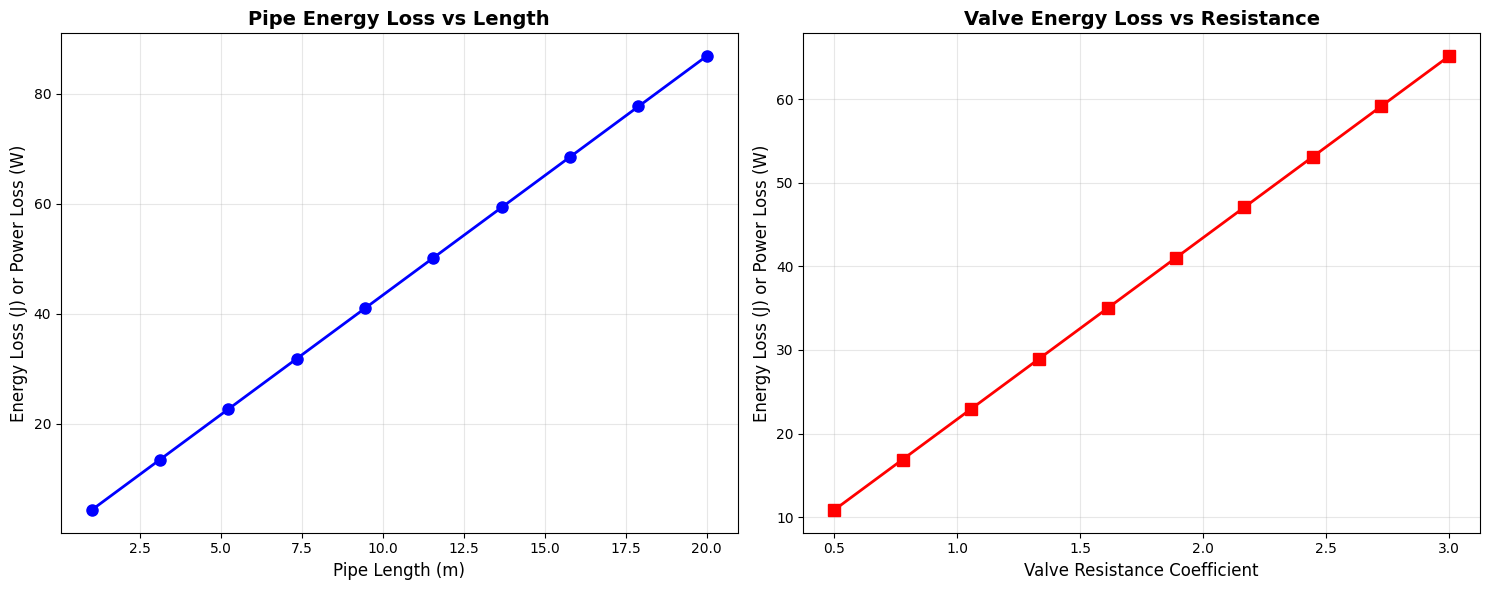


Sensitivity Analysis Results:
Test conditions: 0.013889 m³/s (50.00 m³/h), 13.888889 kg/s (50000.00 kg/h)

Pipe Length Effect:
  Length range: 1.0 - 20.0 m
  Loss increase: 82.52 J (82.52 W)
  Loss per meter: 4.34 J/m (4.34 W/m)

Valve Resistance Effect:
  Coefficient range: 0.5 - 3.0
  Loss increase: 54.29 J (54.29 W)
  Loss per unit resistance: 21.72 J


In [ ]:
# Test effect of pipe length on energy loss
print("Running parameter sensitivity analysis...")
print("\n1. Testing pipe length effect...")
lengths = np.linspace(1, 20, 10)
test_flow_rate_hourly = 50.0  # m³/h (mid-range industrial)
test_flow_rate = test_flow_rate_hourly / 3600  # m³/s
length_losses = []

for length in lengths:
    test_pipe = Pipe(length=length, diameter=0.1, friction_factor=0.02)
    loss = test_pipe.pipeEnergyFunction(
        input_flow=test_flow_rate,
        input_mass=input_mass_flow
    )
    length_losses.append(loss)

# Test effect of valve resistance coefficient
print("2. Testing valve resistance effect...")
resistance_coeffs = np.linspace(0.5, 3.0, 10)
resistance_losses = []

for coeff in resistance_coeffs:
    test_valve = Valve(resistance_coefficient=coeff, diameter=0.1)
    loss = test_valve.valveEnergyFunction(
        input_flow=test_flow_rate,
        input_mass=input_mass_flow
    )
    resistance_losses.append(loss)

# Plot sensitivity analysis
print("\nGenerating sensitivity analysis plots...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(lengths, length_losses, 'b-o', linewidth=2, markersize=8)
ax1.set_xlabel('Pipe Length (m)', fontsize=12)
ax1.set_ylabel('Energy Loss (J) or Power Loss (W)', fontsize=12)
ax1.set_title('Pipe Energy Loss vs Length', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(resistance_coeffs, resistance_losses, 'r-s', linewidth=2, markersize=8)
ax2.set_xlabel('Valve Resistance Coefficient', fontsize=12)
ax2.set_ylabel('Energy Loss (J) or Power Loss (W)', fontsize=12)
ax2.set_title('Valve Energy Loss vs Resistance', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nSensitivity Analysis Results:")
print(f"Test conditions: {test_flow_rate:.6f} m³/s ({test_flow_rate_hourly:.2f} m³/h), {input_mass_flow:.6f} kg/s ({input_mass_flow_hourly:.2f} kg/h)")
print(f"\nPipe Length Effect:")
print(f"  Length range: {lengths[0]:.1f} - {lengths[-1]:.1f} m")
print(f"  Loss increase: {length_losses[-1] - length_losses[0]:.2f} J ({length_losses[-1] - length_losses[0]:.2f} W)")
print(f"  Loss per meter: {(length_losses[-1] - length_losses[0])/(lengths[-1] - lengths[0]):.2f} J/m ({(length_losses[-1] - length_losses[0])/(lengths[-1] - lengths[0]):.2f} W/m)")

print(f"\nValve Resistance Effect:")
print(f"  Coefficient range: {resistance_coeffs[0]:.1f} - {resistance_coeffs[-1]:.1f}")
print(f"  Loss increase: {resistance_losses[-1] - resistance_losses[0]:.2f} J ({resistance_losses[-1] - resistance_losses[0]:.2f} W)")
print(f"  Loss per unit resistance: {(resistance_losses[-1] - resistance_losses[0])/(resistance_coeffs[-1] - resistance_coeffs[0]):.2f} J")

## 7. Mass Conservation and Volumetric Flow Rate Changes

Verify mass conservation and test how volumetric flow rates change through connectors due to energy losses.

In [ ]:
# Test mass conservation and volumetric flow rate changes
print("Running mass conservation tests...")
test_flow_hourly = 50.0  # m³/h (mid-range industrial)
test_flow = test_flow_hourly / 3600  # m³/s
test_mass_flow_hourly = 50000  # kg/h (50 tons/hour - realistic industrial scale)
test_mass_flow = test_mass_flow_hourly / 3600  # kg/s
interval = 1.0  # 1 second time interval

print("=" * 60)
print("MASS CONSERVATION & VOLUMETRIC FLOW RATE TEST")
print("=" * 60)
print(f"Input conditions:")
print(f"  Volumetric flow rate: {test_flow:.6f} m³/s ({test_flow_hourly:.2f} m³/h)")
print(f"  Mass flow rate: {test_mass_flow:.6f} kg/s ({test_mass_flow_hourly:.2f} kg/h)")
print(f"  Time interval: {interval} s\n")

# Test each connector type
connectors = [
    ("Pipe (10m)", pipe),
    ("Bend", bend),
    ("Valve", valve)
]

print("Connector Performance:")
print("-" * 60)

for name, connector in connectors:
    # Calculate output volumetric flow
    output_flow = connector.processFlow(
        input_flow=test_flow,
        input_mass=test_mass_flow,
        interval=interval
    )
    
    # Calculate density
    density = connector.processDensity(
        input_flow=test_flow,
        input_mass=test_mass_flow
    )
    
    # Calculate output mass (should be conserved)
    output_mass = test_mass_flow  # Mass is always conserved in connectors
    
    # Check mass conservation
    mass_conserved = abs(output_mass - test_mass_flow) < 1e-10
    
    print(f"\n{name}:")
    print(f"  Input volumetric flow:  {test_flow:.6f} m³/s ({test_flow * 3600:.2f} m³/h)")
    print(f"  Output volumetric flow: {output_flow:.6f} m³/s ({output_flow * 3600:.2f} m³/h)")
    print(f"  Flow change: {(output_flow - test_flow):.6f} m³/s ({(output_flow - test_flow) / test_flow * 100:.2f}%)")
    print(f"  Density: {density:.2f} kg/m³")
    print(f"  Input mass flow:  {test_mass_flow:.6f} kg/s")
    print(f"  Output mass flow: {output_mass:.6f} kg/s")
    print(f"  Mass conservation: {'✓ PASS' if mass_conserved else '✗ FAIL'}")

print("\n" + "=" * 60)
print("CONCLUSION:")
print("Mass is conserved through all connectors (no leaks).")
print("Volumetric flow rates decrease due to energy losses from friction and resistance.")
print("=" * 60)

# Visualize volumetric flow rate changes
print("\nGenerating volumetric flow rate comparison visualization...")
connector_names = [name for name, _ in connectors]
input_flows = [test_flow * 3600] * len(connectors)  # Convert to m³/h
output_flows_list = []

for name, connector in connectors:
    output = connector.processFlow(
        input_flow=test_flow,
        input_mass=test_mass_flow,
        interval=interval
    )
    output_flows_list.append(output * 3600)  # Convert to m³/h

x = np.arange(len(connector_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, input_flows, width, label='Input Flow', color='#3498db', edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + width/2, output_flows_list, width, label='Output Flow', color='#e74c3c', edgecolor='black', linewidth=1.2)

ax.set_xlabel('Connector Type', fontsize=12)
ax.set_ylabel('Volumetric Flow Rate (m³/h)', fontsize=12)
ax.set_title('Input vs Output Volumetric Flow Rates Through Connectors', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(connector_names)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nTest notebook execution complete! ✓")

Running mass conservation tests...
MASS CONSERVATION & VOLUMETRIC FLOW RATE TEST
Input conditions:
  Volumetric flow rate: 0.013889 m³/s (50.00 m³/h)
  Mass flow rate: 13.888889 kg/s (50000.00 kg/h)
  Time interval: 1.0 s

Connector Performance:
------------------------------------------------------------


AttributeError: module 'math' has no attribute 'root'